<h1> QRT Grand Data Challenge

<h2> 1. Dataset overview and imports

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest


print('Imports completed')

Imports completed


In [78]:
X_train = pd.read_csv('data/X_train.csv')
X_test = pd.read_csv('data/X_test.csv')
y_train = pd.read_csv('data/y_train.csv')
sample = pd.read_csv('data/sample_submission.csv')

In [79]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7735 entries, 0 to 7734
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ROW_ID              7735 non-null   int64  
 1   TS                  7735 non-null   object 
 2   ALLOCATION          7735 non-null   object 
 3   RET_20              7735 non-null   float64
 4   RET_19              7735 non-null   float64
 5   RET_18              7735 non-null   float64
 6   RET_17              7735 non-null   float64
 7   RET_16              7735 non-null   float64
 8   RET_15              7735 non-null   float64
 9   RET_14              7735 non-null   float64
 10  RET_13              7735 non-null   float64
 11  RET_12              7735 non-null   float64
 12  RET_11              7735 non-null   float64
 13  RET_10              7735 non-null   float64
 14  RET_9               7735 non-null   float64
 15  RET_8               7735 non-null   float64
 16  RET_7 

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180245 entries, 0 to 180244
Data columns (total 44 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ROW_ID              180245 non-null  int64  
 1   TS                  180245 non-null  object 
 2   ALLOCATION          180245 non-null  object 
 3   RET_20              180245 non-null  float64
 4   RET_19              180245 non-null  float64
 5   RET_18              180245 non-null  float64
 6   RET_17              180245 non-null  float64
 7   RET_16              180245 non-null  float64
 8   RET_15              180245 non-null  float64
 9   RET_14              180245 non-null  float64
 10  RET_13              180245 non-null  float64
 11  RET_12              180245 non-null  float64
 12  RET_11              180245 non-null  float64
 13  RET_10              180245 non-null  float64
 14  RET_9               180245 non-null  float64
 15  RET_8               180245 non-nul

In [5]:
X_train.describe()

,ROW_ID,RET_20,RET_19,RET_18,RET_17,RET_16,RET_15,RET_14,RET_13,RET_12,...,SIGNED_VOLUME_9,SIGNED_VOLUME_8,SIGNED_VOLUME_7,SIGNED_VOLUME_6,SIGNED_VOLUME_5,SIGNED_VOLUME_4,SIGNED_VOLUME_3,SIGNED_VOLUME_2,SIGNED_VOLUME_1,AVG_DAILY_TURNOVER
count,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,...,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000
mean,90122.000000,0.000049,0.000047,0.000048,0.000044,0.000046,0.000047,0.000048,0.000051,0.000047,...,0.346875,0.346634,0.345756,0.345852,0.346303,0.346012,0.345476,0.347039,0.312530,0.090553
std,52032.393972,0.003219,0.003221,0.003218,0.003210,0.003224,0.003230,0.003230,0.003232,0.003236,...,1.459649,1.457869,1.456189,1.456412,1.451778,1.451993,1.453936,1.455624,1.258024,0.211366
min,0.000000,-0.034057,-0.033873,-0.033873,-0.033873,-0.033880,-0.033880,-0.033880,-0.033880,-0.033868,...,-67.664980,-67.664980,-67.664980,-67.664980,-67.664980,-67.664980,-67.664980,-67.664980,-45.866750,0.000060
25%,45061.000000,-0.001297,-0.001297,-0.001299,-0.001302,-0.001301,-0.001301,-0.001299,-0.001296,-0.001300,...,-0.622953,-0.622107,-0.621620,-0.621587,-0.623241,-0.624514,-0.626985,-0.631204,-0.500096,0.004642
50%,90122.000000,0.000036,0.000035,0.000036,0.000034,0.000033,0.000034,0.000036,0.000036,0.000033,...,0.746502,0.745122,0.744565,0.745393,0.746206,0.747261,0.747909,0.752970,0.632397,0.019241
75%,135183.000000,0.001394,0.001391,0.001393,0.001390,0.001391,0.001396,0.001397,0.001398,0.001395,...,1.106023,1.105206,1.103555,1.103333,1.104396,1.104378,1.104410,1.106166,0.975190,0.058259
max,180244.000000,0.038305,0.038305,0.038199,0.038199,0.038199,0.038199,0.038199,0.038199,0.038199,...,74.096560,74.096560,74.096560,74.096560,45.691677,45.691677,45.463356,45.463356,46.314335,1.580719


In [6]:
X_train.describe(include='O')

,TS,ALLOCATION
count,180245,180245
unique,2773,65
top,DATE_0001,ALLOCATION_01
freq,65,2773


In [7]:
X_train.head()

,ROW_ID,TS,ALLOCATION,RET_20,RET_19,RET_18,RET_17,RET_16,RET_15,RET_14,...,SIGNED_VOLUME_9,SIGNED_VOLUME_8,SIGNED_VOLUME_7,SIGNED_VOLUME_6,SIGNED_VOLUME_5,SIGNED_VOLUME_4,SIGNED_VOLUME_3,SIGNED_VOLUME_2,SIGNED_VOLUME_1,AVG_DAILY_TURNOVER
0,0,DATE_0001,ALLOCATION_01,-0.002477,0.004826,0.005374,-0.001688,-0.000152,-0.000685,-0.002217,...,-1.016154,-1.011450,-1.171714,-0.729594,-1.208138,-1.215123,-0.848346,-0.642461,-0.203447,0.054324
1,1,DATE_0001,ALLOCATION_02,0.006863,-0.005265,-0.004249,0.002686,-0.002638,0.003056,0.002712,...,0.896098,1.429419,0.946527,1.059767,0.988289,0.956915,0.943508,0.124168,0.081083,0.015669
2,2,DATE_0001,ALLOCATION_03,-0.005535,0.008541,0.005360,-0.002491,0.004679,-0.000848,-0.007197,...,-0.889142,-0.939257,-0.980370,-0.863196,-0.839662,-0.882459,-1.172723,-0.863937,-0.695998,0.057961
3,3,DATE_0001,ALLOCATION_04,0.003178,-0.001352,-0.004051,-0.001841,-0.005659,0.000627,0.006686,...,-1.788263,-0.807971,-1.587942,-0.042083,-1.356051,-1.007006,-1.821786,-0.455660,-1.090989,0.096004
4,4,DATE_0001,ALLOCATION_05,0.003359,-0.003349,-0.005460,0.000416,-0.003533,0.000913,0.005088,...,0.326148,1.013100,0.362135,0.774670,0.370484,-0.132558,-0.417645,-1.284208,-1.382900,0.005816


In [8]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7735 entries, 0 to 7734
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ROW_ID              7735 non-null   int64  
 1   TS                  7735 non-null   object 
 2   ALLOCATION          7735 non-null   object 
 3   RET_20              7735 non-null   float64
 4   RET_19              7735 non-null   float64
 5   RET_18              7735 non-null   float64
 6   RET_17              7735 non-null   float64
 7   RET_16              7735 non-null   float64
 8   RET_15              7735 non-null   float64
 9   RET_14              7735 non-null   float64
 10  RET_13              7735 non-null   float64
 11  RET_12              7735 non-null   float64
 12  RET_11              7735 non-null   float64
 13  RET_10              7735 non-null   float64
 14  RET_9               7735 non-null   float64
 15  RET_8               7735 non-null   float64
 16  RET_7 

In [9]:
X_test.describe()

,ROW_ID,RET_20,RET_19,RET_18,RET_17,RET_16,RET_15,RET_14,RET_13,RET_12,...,SIGNED_VOLUME_9,SIGNED_VOLUME_8,SIGNED_VOLUME_7,SIGNED_VOLUME_6,SIGNED_VOLUME_5,SIGNED_VOLUME_4,SIGNED_VOLUME_3,SIGNED_VOLUME_2,SIGNED_VOLUME_1,AVG_DAILY_TURNOVER
count,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,...,7735.000000,7735.000000,7735.000000,7676.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000
mean,184112.000000,-0.000031,-0.000075,-0.000023,0.000016,0.000115,0.000119,0.000010,0.000065,-0.000054,...,0.391035,0.400705,0.372728,0.391833,0.368366,0.416738,0.382572,0.422824,0.291271,0.086437
std,2233.046499,0.003970,0.003473,0.002951,0.003063,0.003038,0.003591,0.003187,0.003710,0.003298,...,1.309588,1.466399,1.299512,1.321934,1.350420,1.298961,1.323287,1.299067,1.014690,0.217977
min,180245.000000,-0.069293,-0.029015,-0.029395,-0.029063,-0.021838,-0.033068,-0.025319,-0.029438,-0.023345,...,-11.636165,-48.806396,-12.053021,-10.466323,-19.391768,-10.787054,-16.648079,-9.743671,-7.725879,0.000154
25%,182178.500000,-0.001621,-0.001674,-0.001545,-0.001514,-0.001386,-0.001472,-0.001562,-0.001540,-0.001597,...,-0.539940,-0.575735,-0.536445,-0.572215,-0.616311,-0.588531,-0.578938,-0.542556,-0.385317,0.004717
50%,184112.000000,-0.000035,-0.000007,-0.000013,0.000014,0.000092,0.000003,-0.000017,0.000003,-0.000033,...,0.793514,0.813243,0.786609,0.810943,0.809134,0.839687,0.806879,0.805861,0.568110,0.016478
75%,186045.500000,0.001549,0.001553,0.001511,0.001493,0.001639,0.001540,0.001530,0.001547,0.001478,...,1.118323,1.115314,1.101853,1.143613,1.096189,1.144513,1.127580,1.115669,0.879886,0.044575
max,187979.000000,0.047968,0.025006,0.020434,0.023931,0.019229,0.037660,0.027331,0.032316,0.024474,...,10.227108,23.734669,8.011360,8.795315,10.373502,19.734356,9.067154,10.373459,6.319981,1.527174


In [10]:
X_test.describe(include='O')

,TS,ALLOCATION
count,7735,7735
unique,119,65
top,DATE_2774,ALLOCATION_01
freq,65,119


In [11]:
X_test.head(70)

,ROW_ID,TS,ALLOCATION,RET_20,RET_19,RET_18,RET_17,RET_16,RET_15,RET_14,...,SIGNED_VOLUME_9,SIGNED_VOLUME_8,SIGNED_VOLUME_7,SIGNED_VOLUME_6,SIGNED_VOLUME_5,SIGNED_VOLUME_4,SIGNED_VOLUME_3,SIGNED_VOLUME_2,SIGNED_VOLUME_1,AVG_DAILY_TURNOVER
0,180245,DATE_2774,ALLOCATION_01,-0.006869,-0.001703,-0.003348,-0.003129,-0.003368,-0.002515,-0.001182,...,1.467264,1.114890,1.227472,0.835403,1.571033,0.946056,1.691493,3.561658,0.038297,0.010310
1,180246,DATE_2774,ALLOCATION_02,-0.002409,-0.000763,0.001349,-0.002069,-0.000147,0.002263,-0.004348,...,0.212862,0.571286,0.711297,0.815702,-0.102490,0.969315,1.738142,5.400385,2.127508,0.013252
2,180247,DATE_2774,ALLOCATION_03,-0.004936,-0.001041,-0.004108,-0.002354,-0.003627,0.000263,0.001072,...,1.165160,1.004918,1.159257,1.110129,1.473592,1.013560,1.622486,2.346189,0.676293,0.013975
3,180248,DATE_2774,ALLOCATION_04,-0.008992,-0.000644,0.001352,-0.004524,-0.004002,-0.004404,0.000524,...,1.557001,1.156245,1.688199,0.553323,2.060668,0.746113,2.300634,5.564923,-0.637974,0.017026
4,180249,DATE_2774,ALLOCATION_05,-0.002797,-0.001686,0.002453,-0.000645,0.000615,-0.000624,-0.004374,...,0.135133,0.115105,0.344619,0.312612,0.932051,0.335749,1.021416,2.351529,0.030891,0.006701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,180310,DATE_2775,ALLOCATION_01,0.001492,0.003836,-0.002736,0.000867,0.001361,-0.003420,0.000498,...,1.620890,1.752802,1.987774,3.717221,1.969099,1.786482,2.277948,2.236189,1.574036,0.039296
66,180311,DATE_2775,ALLOCATION_02,-0.001004,0.000786,0.001672,-0.004822,0.000780,0.005752,-0.000114,...,2.123775,2.491327,3.982524,1.628860,1.141928,1.302914,1.949023,0.831566,1.466624,0.015080
67,180312,DATE_2775,ALLOCATION_03,0.001220,0.005028,-0.000982,0.002371,0.000495,-0.003739,-0.000054,...,1.055995,1.256934,1.335385,2.569958,1.367763,1.244728,1.655826,1.747727,1.318365,0.041072
68,180313,DATE_2775,ALLOCATION_04,0.000963,0.003119,-0.003957,-0.000383,0.001816,0.000248,0.002078,...,2.086635,1.718470,1.658662,3.006546,2.007813,1.781856,1.714665,1.876948,1.313433,0.059018


<h2> EDA + Visualization

In [12]:
ret_cols = [f'RET_{i}' for i in range(1,21)]
vol_cols = [f'SIGNED_VOLUME_{i}' for i in range(1,21)]

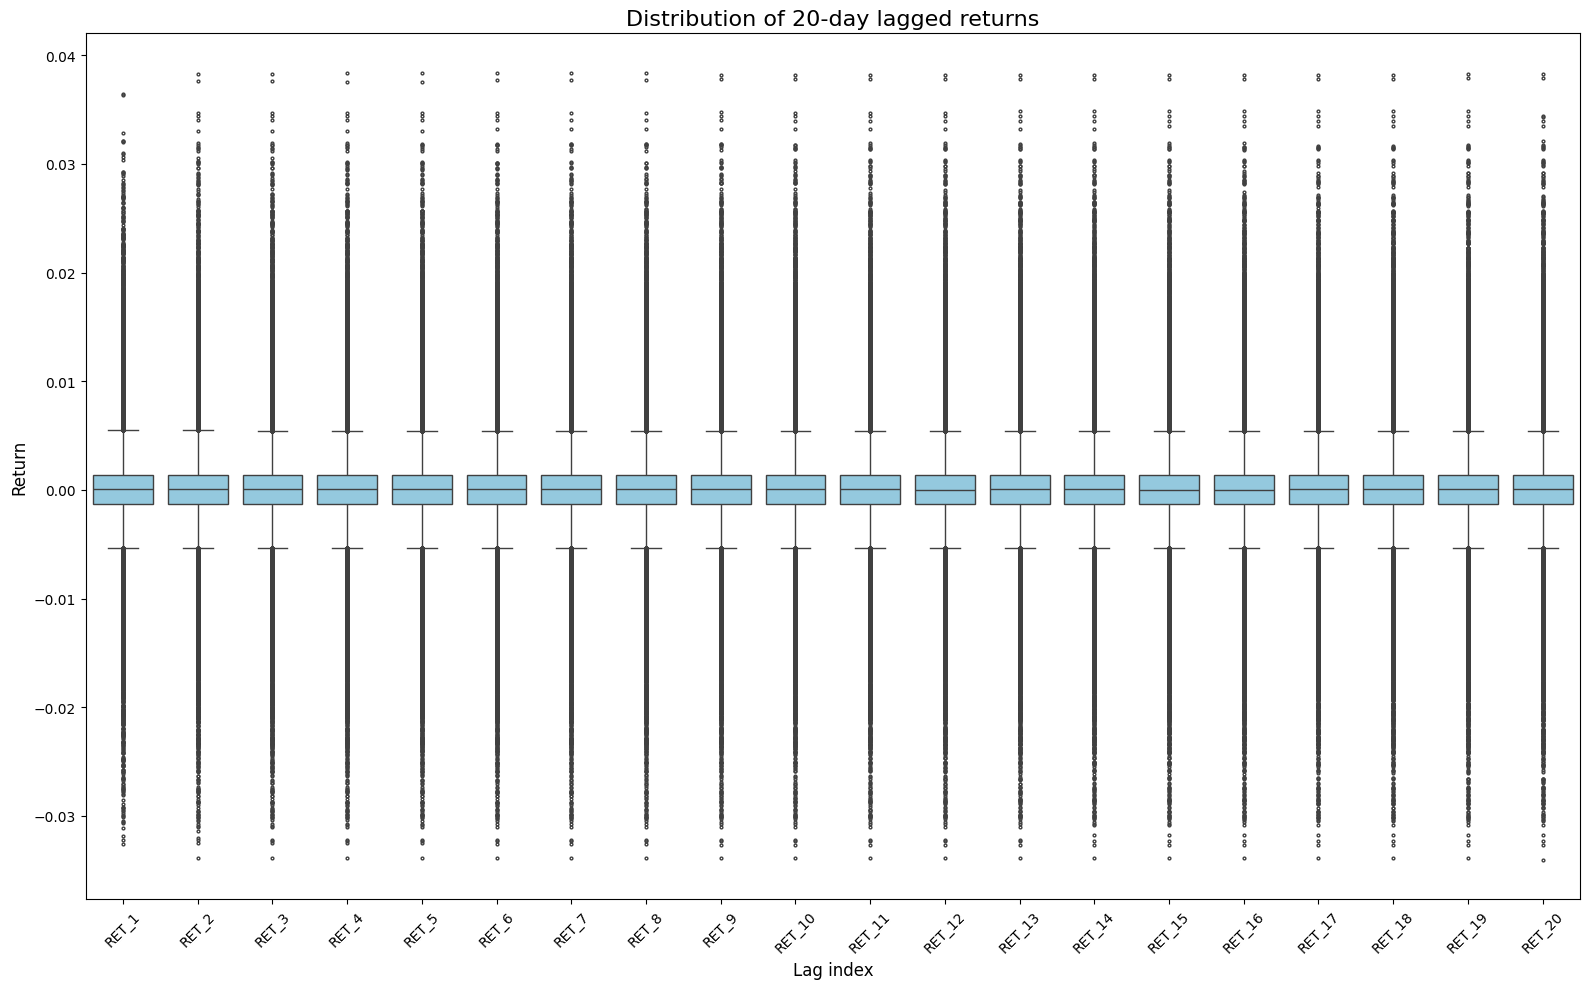

In [13]:
plt.figure(figsize=(16, 10))  # 👈 increase width and height here
sns.boxplot(data=X_train[ret_cols], color='skyblue', fliersize=2)
plt.title("Distribution of 20-day lagged returns", fontsize=16)
plt.xlabel("Lag index", fontsize=12)
plt.ylabel("Return", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

Observations :
- The median seems always close to O
- A big number of outliers indicates a certain noise in the dataset

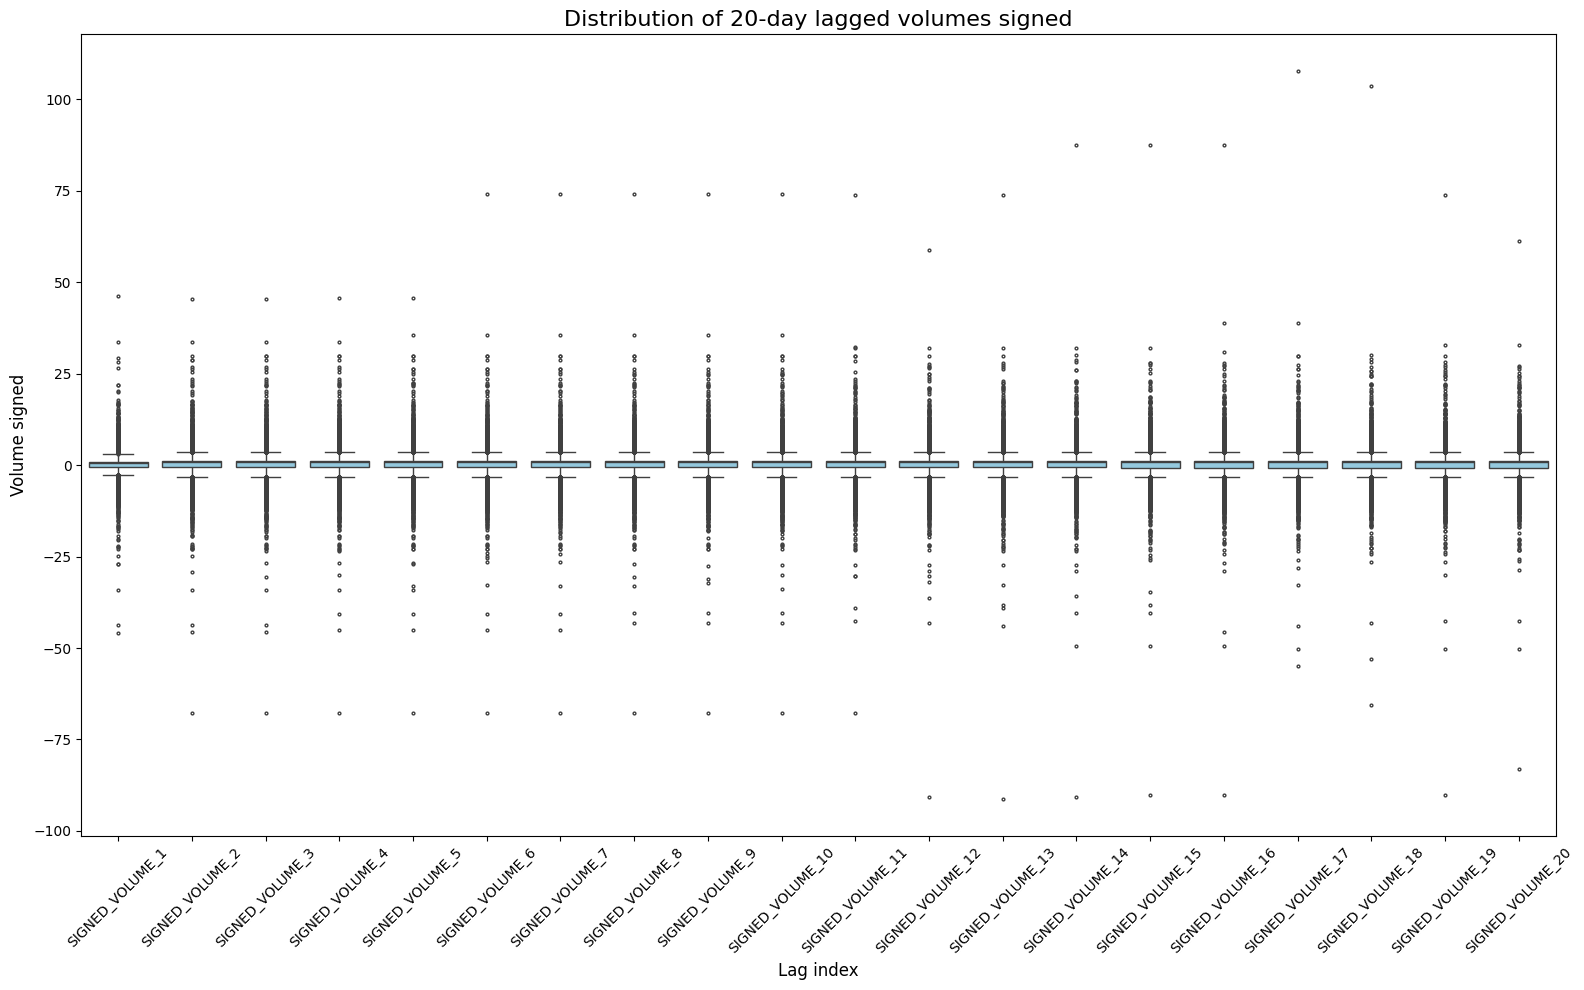

In [14]:
plt.figure(figsize=(16, 10))  # 👈 increase width and height here
sns.boxplot(data=X_train[vol_cols], color='skyblue', fliersize=2)
plt.title("Distribution of 20-day lagged volumes signed", fontsize=16)
plt.xlabel("Lag index", fontsize=12)
plt.ylabel("Volume signed", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

Still quite a few outliers !

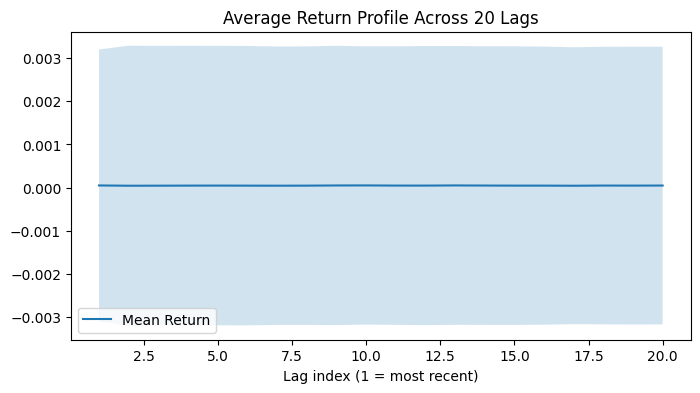

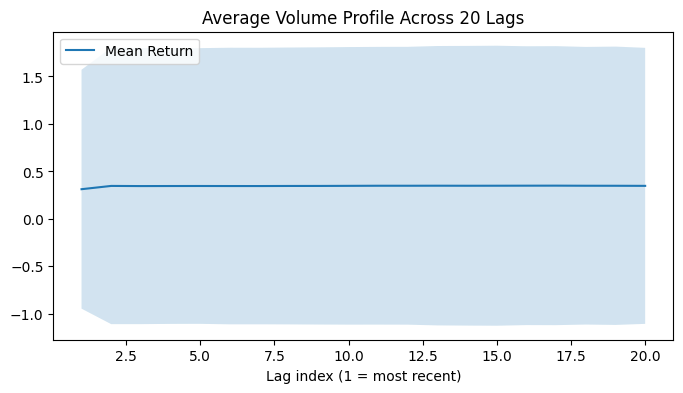

In [15]:
mean_returns = X_train[ret_cols].mean()
mean_volumes = X_train[vol_cols].mean()
std_returns = X_train[ret_cols].std()
std_volumes = X_train[vol_cols].std()



plt.figure(figsize=(8, 4))
plt.plot(range(1, 21), mean_returns, label="Mean Return")
plt.fill_between(range(1, 21),
                 mean_returns - std_returns,
                 mean_returns + std_returns,
                 alpha=0.2)
plt.title("Average Return Profile Across 20 Lags")
plt.xlabel("Lag index (1 = most recent)")
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(range(1, 21), mean_volumes, label="Mean Return")
plt.fill_between(range(1, 21),
                 mean_volumes- std_volumes,
                 mean_volumes + std_volumes,
                 alpha=0.2)
plt.title("Average Volume Profile Across 20 Lags")
plt.xlabel("Lag index (1 = most recent)")
plt.legend()
plt.show()


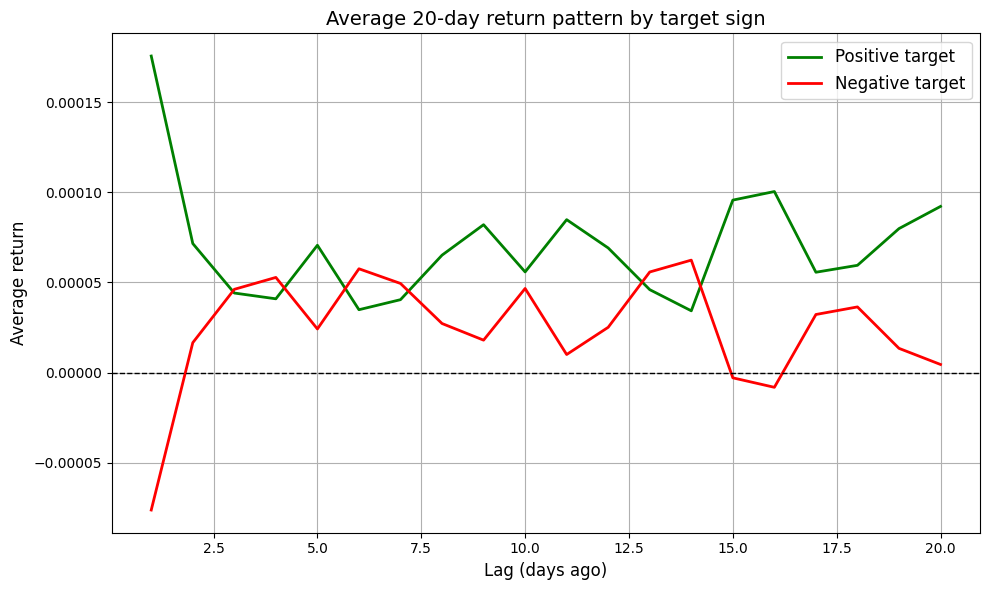

In [16]:
pos_index = (y_train[(y_train.target >0)]).index
neg_index = (y_train[(y_train.target <=0)]).index
pos = X_train.iloc[pos_index,:][ret_cols]
neg = X_train.iloc[neg_index,:][ret_cols]

mean_pos = pos.mean()
mean_neg = neg.mean()

# Plot both on same figure
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), mean_pos, label="Positive target", color="green", linewidth=2)
plt.plot(range(1, 21), mean_neg, label="Negative target", color="red", linewidth=2)

# Optional: add a horizontal line at 0
plt.axhline(0, color="black", linestyle="--", linewidth=1)

# Titles and legend
plt.title("Average 20-day return pattern by target sign", fontsize=14)
plt.xlabel("Lag (days ago)", fontsize=12)
plt.ylabel("Average return", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
y_train = y_train.drop(columns=['ROW_ID'])

In [32]:
pd.DataFrame((y_train.target>0).astype(int))

,target
0,1
1,0
2,1
3,0
4,0
...,...
180240,0
180241,1
180242,0
180243,1


Feature engineering of Olivier

In [ ]:
def feature_engineering(X):
    RET_features = [f'RET_{i}' for i in range(1, 20)]
    SIGNED_VOLUME_features = [f'SIGNED_VOLUME_{i}' for i in range(1, 20)]
    TURNOVER_features = ['AVG_DAILY_TURNOVER']

    for i in range(2,21):
        X[f'AVERAGE_PERF_{i}'] = X[RET_features[:i]].mean(1)
        X[f'ALLOCATIONS_AVERAGE_PERF_{i}'] = X.groupby('TS')[f'AVERAGE_PERF_{i}'].transform('mean')
        X[f'AVERAGE_VOL_{i}'] = X[SIGNED_VOLUME_features[:i]].mean(1)
        X_train[f'STD_PERF_{i}'] = X[RET_features[:i]].std(axis=1)
        X_train[f'STD_VOL_{i}'] = X[SIGNED_VOLUME_features[:i]].std(axis=1)



    X["RET_VOLATILITY_20"] = X[RET_features].std(axis=1)
    X["RET_MOMENTUM"] = X["RET_1"] - X[RET_features].mean(axis=1)
    X["RET_SHARPE"] = X["RET_MOMENTUM"] / (X["RET_VOLATILITY_20"] + 1e-6)
    X["SIGNED_VOLUME_VOL"] = X[SIGNED_VOLUME_features].std(axis=1)
    X["TS_num"] = X["TS"].str.extract("(\d+)").astype(int)
    X["RET_TREND_5"] = X["RET_20"] - X["RET_15"]
    X["VOL_TREND_5"] = X["SIGNED_VOLUME_20"] - X["SIGNED_VOLUME_15"]
    X["RET_LAG1"] = X["RET_1"]
    X["RET_DIFF1"] = X["RET_1"] - X["RET_2"]

    X["RET_SKEW_20"] = X[RET_features].skew(axis=1)
    X["RET_KURT_20"] = X[RET_features].kurt(axis=1)
    X["VOL_PERF_RATIO"] = X[SIGNED_VOLUME_features].mean(axis=1) / (X[RET_features].std(axis=1) + 1e-6)

    weights = np.linspace(1, 2, 19)
    X["RET_WEIGHTED_MOMENTUM"] = (X[RET_features].values * weights).sum(axis=1) / weights.sum()

    return X, RET_features, SIGNED_VOLUME_features, TURNOVER_features

In [ ]:
X = X_train.copy()

RET_features = [f'RET_{i}' for i in range(1, 20)]
SIGNED_VOLUME_features = [f'SIGNED_VOLUME_{i}' for i in range(1, 20)]
TURNOVER_features = ['AVG_DAILY_TURNOVER']

for i in range (2,21):
    X_train[f'AVERAGE_PERF_{i}'] = X_train[RET_features[:i]].mean(1)
    X_train[f'ALLOCATIONS_AVERAGE_PERF_{i}'] = X_train.groupby('TS')[f'AVERAGE_PERF_{i}'].transform('mean')
    X_train[f'STD_PERF_{i}'] = X_train[RET_features[:i]].std(axis=1)

X["RET_VOLATILITY_20"] = X[RET_features].std(axis=1)
X["RET_MOMENTUM"] = X["RET_1"] - X[RET_features].mean(axis=1)
X["RET_SHARPE"] = X["RET_MOMENTUM"] / (X["RET_VOLATILITY_20"] + 1e-6)
X["SIGNED_VOLUME_VOL"] = X[SIGNED_VOLUME_features].std(axis=1)
X["TS_num"] = X["TS"].str.extract("(\d+)").astype(int)
X["RET_TREND_5"] = X["RET_20"] - X["RET_15"]
X["VOL_TREND_5"] = X["SIGNED_VOLUME_20"] - X["SIGNED_VOLUME_15"]
X["RET_LAG1"] = X["RET_1"]
X["RET_DIFF1"] = X["RET_1"] - X["RET_2"]

# Skewness et kurtosis sur les 20 derniers jours
X["RET_SKEW_20"] = X[RET_features].skew(axis=1)
X["RET_KURT_20"] = X[RET_features].kurt(axis=1)

# Ratio volume/performance (liquidité relative)
X["VOL_PERF_RATIO"] = X[SIGNED_VOLUME_features].mean(axis=1) / (X[RET_features].std(axis=1) + 1e-6)

# Moyenne pondérée des performances récentes (momentum lissé)
weights = np.linspace(1, 2, 19)
X["RET_WEIGHTED_MOMENTUM"] = (X[RET_features].values * weights).sum(axis=1) / weights.sum()

enc = TargetEncoder()
X["alloc_enc"] = enc.fit_transform(X_train[["ALLOCATION"]], (y_train.target>0).astype(int))
X["ALLOC_TS_INTER"] = X["alloc_enc"] * X["TS_num"]

features = (
    RET_features
    + SIGNED_VOLUME_features
    + TURNOVER_features
    + [f'AVERAGE_PERF_{i}' for i in [3, 5, 10, 15, 20]]
    + [f'ALLOCATIONS_AVERAGE_PERF_{i}' for i in [3, 5, 10, 15, 20]]
    + ["RET_VOLATILITY_20", "RET_MOMENTUM", "RET_SHARPE", "SIGNED_VOLUME_VOL","VOL_TREND_5","RET_TREND_5"]
    + ["alloc_enc"]
    +["TS_num"]
    +["VOL_PERF_RATIO","RET_KURT_20","RET_SKEW_20","RET_DIFF1","RET_LAG1"]
)

<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\d'
/var/folders/tp/p2fdv61s7979qs0rlp6mh9qw0000gn/T/ipykernel_54693/344394643.py:15: SyntaxWarning: invalid escape sequence '\d'
  X["TS_num"] = X["TS"].str.extract("(\d+)").astype(int)


It seems that the mean last day return is quite correlated with the sign of the return of the next day. It could be very useful to create a feature representing the mean, and if that mean if higher than 0.00005 ?

Text(0.5, 1.0, 'Feature Correlation Heatmap')

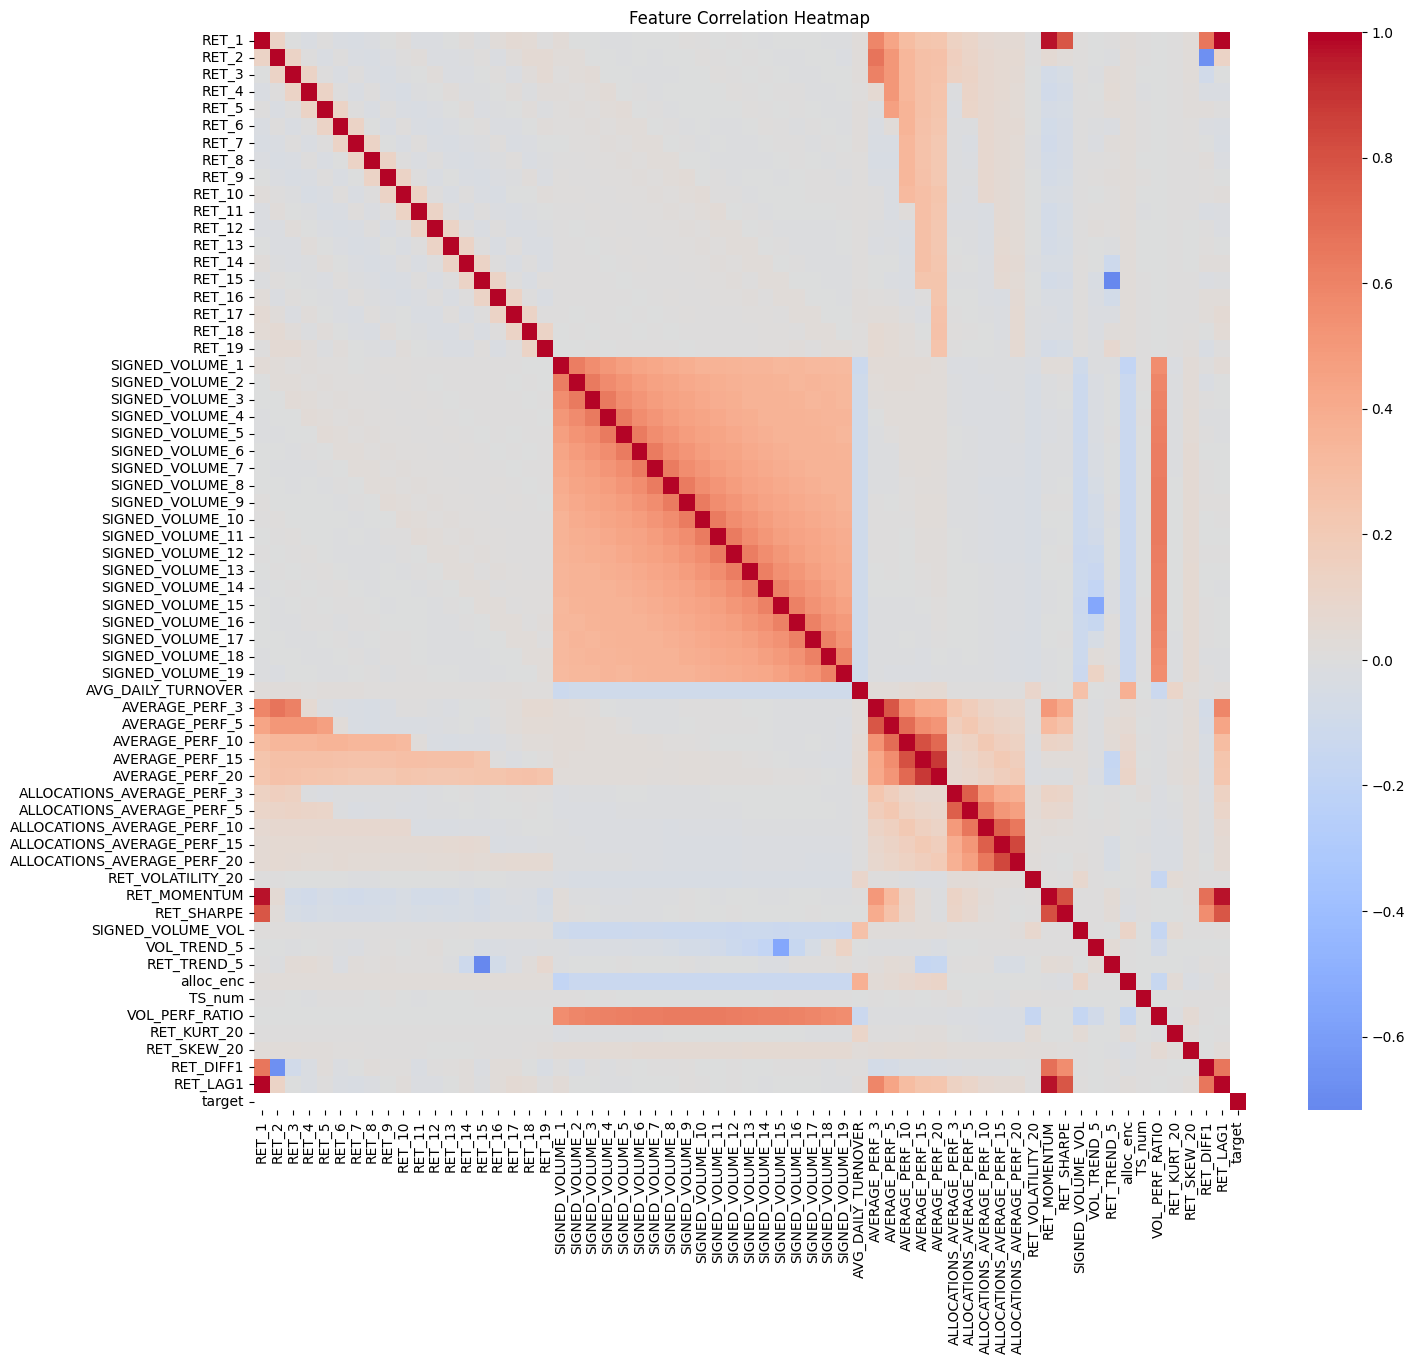

In [41]:
plt.figure(figsize=(16,14))
corr = pd.concat([X[features], y_train.target]).corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")

Observation :
- The return of two consecutive days are a bit correlated, that makes sense with the graph plotting the positive/negative target std_returns
- The volumes are very correlated, we can think about the PCA or dropping some columns to avoid too highly correlated features

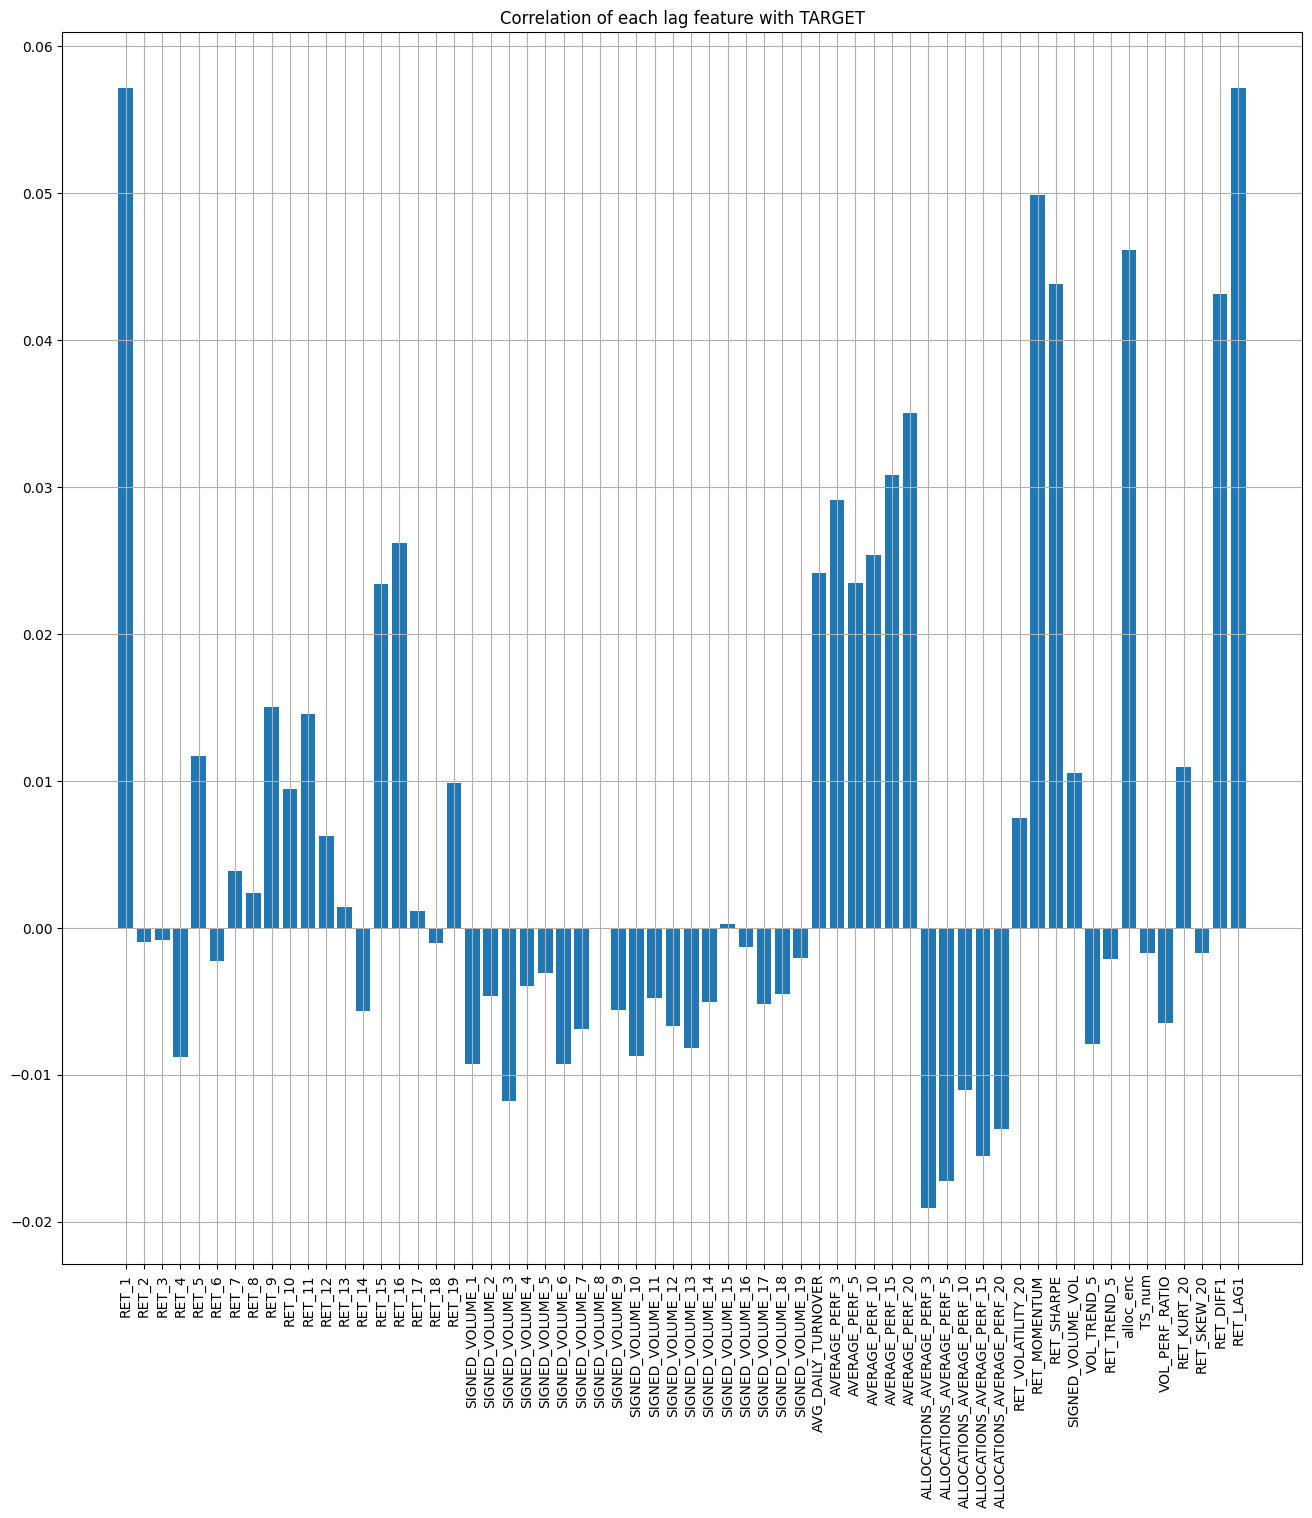

In [39]:
plt.figure(figsize=(16,16))
corrs = [np.corrcoef(X[col], y_train.T)[0, 1] for col in features]
plt.bar(range(len(corrs)), corrs)
plt.xticks(range(len(corrs)), features, rotation=90)
plt.title("Correlation of each lag feature with TARGET")
plt.grid()

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180245 entries, 0 to 180244
Data columns (total 69 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ROW_ID                       180245 non-null  int64  
 1   TS                           180245 non-null  object 
 2   ALLOCATION                   180245 non-null  object 
 3   RET_20                       180245 non-null  float64
 4   RET_19                       180245 non-null  float64
 5   RET_18                       180245 non-null  float64
 6   RET_17                       180245 non-null  float64
 7   RET_16                       180245 non-null  float64
 8   RET_15                       180245 non-null  float64
 9   RET_14                       180245 non-null  float64
 10  RET_13                       180245 non-null  float64
 11  RET_12                       180245 non-null  float64
 12  RET_11                       180245 non-null  float64
 13 

Preprocessing + PCA + Isolation Forest

In [46]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X.drop(columns=['ROW_ID', 'TS', 'ALLOCATION']))

In [52]:
import numpy as np
from sklearn.decomposition import PCA

# Ajuste ton seuil ici (ex. 0.95 = 95 % de variance expliquée)
variance_threshold = 0.95

# Fit PCA sur toutes les dimensions possibles
pca_full = PCA(random_state=42)
pca_full.fit(X_scaled)

# Calcul de la variance cumulée
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Trouver le plus petit k tel que variance cumulée >= seuil
optimal_k = np.argmax(cumulative_variance >= variance_threshold) + 1

print(f"Nombre optimal de composantes PCA : {optimal_k}")
print(f"Variance expliquée cumulée : {cumulative_variance[optimal_k-1]:.4f}")

# Recalcule le PCA final avec ce nombre de composantes
pca_optimal = PCA(n_components=optimal_k, random_state=42)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

print("Forme du jeu de données après PCA :", X_pca_optimal.shape)


Nombre optimal de composantes PCA : 43
Variance expliquée cumulée : 0.9528
Forme du jeu de données après PCA : (180245, 43)


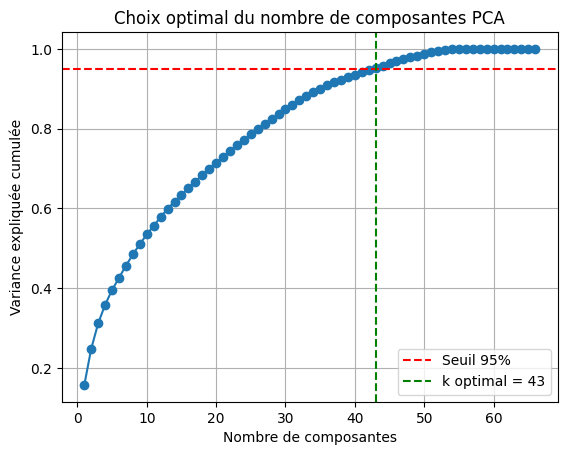

In [53]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.axhline(variance_threshold, color='r', linestyle='--', label=f'Seuil {variance_threshold*100:.0f}%')
plt.axvline(optimal_k, color='g', linestyle='--', label=f'k optimal = {optimal_k}')
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliquée cumulée")
plt.title("Choix optimal du nombre de composantes PCA")
plt.legend()
plt.grid(True)
plt.show()


In [73]:
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

# --- Paramètres ---
pca_components = [5, 15, 25, 35, 45]         # ajout de 35 et 45
iso_contaminations = [0.04, 0.08, 0.12]      # ajout de 12%

# --- Étape 1 : Créer et ajuster les PCA ---
pca_models = {f"pca{k}": PCA(n_components=k, random_state=42) for k in pca_components}
X_pca = {f"X_pca{k}": model.fit_transform(X_scaled) for k, model in pca_models.items()}

# --- Étape 2 : Créer les IsolationForest ---
iso_models = {f"iso{int(c*100)}": IsolationForest(contamination=c, random_state=42) for c in iso_contaminations}

# --- Étape 3 : Entraîner les IsolationForest sur chaque PCA ---
labels = {}
for k, Xpca in X_pca.items():          # k = "X_pca5", "X_pca15", ...
    for c_str, iso in iso_models.items():  # c_str = "iso4", "iso8", "iso12"
        c_val = iso.contamination          # on récupère la vraie valeur 0.04, 0.08 ou 0.12
        label_name = f"label_{k[6:]}_{int(c_val*100)}"  # ex: label_5_4, label_15_8
        labels[label_name] = iso.fit_predict(Xpca)
        print(f"{label_name} créé → {sum(labels[label_name]==-1)} anomalies détectées")


label_ca5_4 créé → 7210 anomalies détectées
label_ca5_8 créé → 14420 anomalies détectées
label_ca5_12 créé → 21630 anomalies détectées
label_ca15_4 créé → 7210 anomalies détectées
label_ca15_8 créé → 14420 anomalies détectées
label_ca15_12 créé → 21630 anomalies détectées
label_ca25_4 créé → 7210 anomalies détectées
label_ca25_8 créé → 14420 anomalies détectées
label_ca25_12 créé → 21630 anomalies détectées
label_ca35_4 créé → 7210 anomalies détectées
label_ca35_8 créé → 14420 anomalies détectées
label_ca35_12 créé → 21630 anomalies détectées
label_ca45_4 créé → 7210 anomalies détectées
label_ca45_8 créé → 14420 anomalies détectées
label_ca45_12 créé → 21630 anomalies détectées


In [63]:
labels

{'label_ca5_4': array([1, 1, 1, ..., 1, 1, 1], shape=(180245,)),
 'label_ca5_8': array([1, 1, 1, ..., 1, 1, 1], shape=(180245,)),
 'label_ca15_4': array([1, 1, 1, ..., 1, 1, 1], shape=(180245,)),
 'label_ca15_8': array([1, 1, 1, ..., 1, 1, 1], shape=(180245,)),
 'label_ca25_4': array([1, 1, 1, ..., 1, 1, 1], shape=(180245,)),
 'label_ca25_8': array([1, 1, 1, ..., 1, 1, 1], shape=(180245,))}

In [65]:
X.columns

Index(['ROW_ID', 'TS', 'ALLOCATION', 'RET_20', 'RET_19', 'RET_18', 'RET_17',
       'RET_16', 'RET_15', 'RET_14', 'RET_13', 'RET_12', 'RET_11', 'RET_10',
       'RET_9', 'RET_8', 'RET_7', 'RET_6', 'RET_5', 'RET_4', 'RET_3', 'RET_2',
       'RET_1', 'SIGNED_VOLUME_20', 'SIGNED_VOLUME_19', 'SIGNED_VOLUME_18',
       'SIGNED_VOLUME_17', 'SIGNED_VOLUME_16', 'SIGNED_VOLUME_15',
       'SIGNED_VOLUME_14', 'SIGNED_VOLUME_13', 'SIGNED_VOLUME_12',
       'SIGNED_VOLUME_11', 'SIGNED_VOLUME_10', 'SIGNED_VOLUME_9',
       'SIGNED_VOLUME_8', 'SIGNED_VOLUME_7', 'SIGNED_VOLUME_6',
       'SIGNED_VOLUME_5', 'SIGNED_VOLUME_4', 'SIGNED_VOLUME_3',
       'SIGNED_VOLUME_2', 'SIGNED_VOLUME_1', 'AVG_DAILY_TURNOVER',
       'AVERAGE_PERF_3', 'ALLOCATIONS_AVERAGE_PERF_3', 'AVERAGE_PERF_5',
       'ALLOCATIONS_AVERAGE_PERF_5', 'AVERAGE_PERF_10',
       'ALLOCATIONS_AVERAGE_PERF_10', 'AVERAGE_PERF_15',
       'ALLOCATIONS_AVERAGE_PERF_15', 'AVERAGE_PERF_20',
       'ALLOCATIONS_AVERAGE_PERF_20', 'alloc_enc', 'R

In [74]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

ridge_params = dict(alpha=1e-2, fit_intercept=False)
n_splits = 5
random_state = 42
results = []

# --- Créons un mapping explicite label → PCA ---
label_to_pca = {}
for label_name in labels.keys():
    # Cherchons dans X_pca celle dont le n_components est contenu dans le nom du label
    for pca_key in X_pca.keys():
        if pca_key[6:] in label_name:  # ex: "5" dans "label_5_4"
            label_to_pca[label_name] = pca_key
            break
    else:
        raise KeyError(f"Impossible de trouver PCA correspondante pour {label_name}")

# --- Boucle sur chaque label ---
for label_name, lbl_array in labels.items():
    print(f"\n=== Test avec {label_name} ===")

    pca_key = label_to_pca[label_name]
    X_train_pca = X_pca[pca_key]

    # Filtrage des inliers
    mask = lbl_array == 1
    X_train_clean = X_train_pca[mask]
    y_train_clean = y_train[mask].squeeze()   # Assure-toi que y_train est aligné avec X_scaled
    y_train_clean = (y_train_clean > 0).astype(int).squeeze()


    print(f"Train shape after PCA+ISO ({label_name}): {X_train_clean.shape}")
    print(f"Outliers retirés: {(lbl_array == -1).sum()}")

    # K-Fold
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    oof_preds = np.zeros(len(y_train_clean))
    fold_scores = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_clean, y_train_clean)):
        X_tr, X_val = X_train_clean[train_idx], X_train_clean[val_idx]
        y_tr, y_val = y_train_clean.iloc[train_idx], y_train_clean.iloc[val_idx]

        model = RidgeClassifier(**ridge_params)
        model.fit(X_tr, y_tr)

        y_val_pred = model.predict(X_val)
        oof_preds[val_idx] = y_val_pred

        acc = accuracy_score(y_val, y_val_pred)
        f1 = f1_score(y_val, y_val_pred)
        auc = roc_auc_score(y_val, y_val_pred)
        fold_scores.append(dict(fold=fold+1, acc=acc, f1=f1, auc=auc))

        print(f"Fold {fold+1} → ACC={acc:.4f}, F1={f1:.4f}, AUC={auc:.4f}")

    # Scores globaux OOF
    acc_oof = accuracy_score(y_train_clean, oof_preds)
    f1_oof = f1_score(y_train_clean, oof_preds)
    auc_oof = roc_auc_score(y_train_clean, oof_preds)
    print(f"OOF ({label_name}) → ACC={acc_oof:.4f}, F1={f1_oof:.4f}, AUC={auc_oof:.4f}")

    results.append({
        "label": label_name,
        "pca_key": pca_key,
        "oof_acc": acc_oof,
        "oof_f1": f1_oof,
        "oof_auc": auc_oof,
        "fold_details": fold_scores
    })

# Comparaison globale
res_df = pd.DataFrame([
    {"Label": r["label"], "PCA": r["pca_key"], "OOF_ACC": r["oof_acc"], "OOF_F1": r["oof_f1"], "OOF_AUC": r["oof_auc"]}
    for r in results
])

display(res_df.sort_values("OOF_AUC", ascending=False))



=== Test avec label_ca5_4 ===
Train shape after PCA+ISO (label_ca5_4): (173035, 5)
Outliers retirés: 7210
Fold 1 → ACC=0.5186, F1=0.5169, AUC=0.5187
Fold 2 → ACC=0.5227, F1=0.5162, AUC=0.5227
Fold 3 → ACC=0.5226, F1=0.5180, AUC=0.5226
Fold 4 → ACC=0.5126, F1=0.5065, AUC=0.5127
Fold 5 → ACC=0.5202, F1=0.5128, AUC=0.5201
OOF (label_ca5_4) → ACC=0.5193, F1=0.5141, AUC=0.5194

=== Test avec label_ca5_8 ===
Train shape after PCA+ISO (label_ca5_8): (165825, 5)
Outliers retirés: 14420
Fold 1 → ACC=0.5189, F1=0.5157, AUC=0.5190
Fold 2 → ACC=0.5205, F1=0.5134, AUC=0.5207
Fold 3 → ACC=0.5192, F1=0.5117, AUC=0.5192
Fold 4 → ACC=0.5189, F1=0.5124, AUC=0.5189
Fold 5 → ACC=0.5208, F1=0.5184, AUC=0.5208
OOF (label_ca5_8) → ACC=0.5197, F1=0.5143, AUC=0.5197

=== Test avec label_ca5_12 ===
Train shape after PCA+ISO (label_ca5_12): (158615, 5)
Outliers retirés: 21630
Fold 1 → ACC=0.5183, F1=0.5124, AUC=0.5183
Fold 2 → ACC=0.5202, F1=0.5132, AUC=0.5202
Fold 3 → ACC=0.5188, F1=0.5119, AUC=0.5189
Fold 4 →

,Label,PCA,OOF_ACC,OOF_F1,OOF_AUC
12,label_ca45_4,X_pcapca45,0.526853,0.512130,0.526995
14,label_ca45_12,X_pcapca45,0.526621,0.506445,0.526805
9,label_ca35_4,X_pcapca35,0.526414,0.509373,0.526614
13,label_ca45_8,X_pcapca45,0.526314,0.508998,0.526475
10,label_ca35_8,X_pcapca35,0.526320,0.510452,0.526464
11,label_ca35_12,X_pcapca35,0.525669,0.512682,0.525775
7,label_ca25_8,X_pcapca25,0.525530,0.527802,0.525519
6,label_ca25_4,X_pcapca25,0.525275,0.520747,0.525348
8,label_ca25_12,X_pcapca25,0.524143,0.527252,0.524125
3,label_ca15_4,X_pcapca15,0.522703,0.497625,0.522934


In [81]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from category_encoders import TargetEncoder
from sklearn.linear_model import RidgeClassifier
from sklearn.impute import SimpleImputer

# ==========================
# 1️⃣ Feature Engineering sur X_test
# ==========================
X_test_proc = X_test.copy()

imputer = SimpleImputer(strategy="mean")


RET_features = [f'RET_{i}' for i in range(1, 20)]
SIGNED_VOLUME_features = [f'SIGNED_VOLUME_{i}' for i in range(1, 20)]
TURNOVER_features = ['AVG_DAILY_TURNOVER']

for i in [3, 5, 10, 15, 20]:
    X_test_proc[f'AVERAGE_PERF_{i}'] = X_test_proc[RET_features[:i]].mean(axis=1)
    X_test_proc[f'ALLOCATIONS_AVERAGE_PERF_{i}'] = X_test_proc.groupby('TS')[f'AVERAGE_PERF_{i}'].transform('mean')

X_test_proc["RET_VOLATILITY_20"] = X_test_proc[RET_features].std(axis=1)
X_test_proc["RET_MOMENTUM"] = X_test_proc["RET_1"] - X_test_proc[RET_features].mean(axis=1)
X_test_proc["RET_SHARPE"] = X_test_proc["RET_MOMENTUM"] / (X_test_proc["RET_VOLATILITY_20"] + 1e-6)
X_test_proc["SIGNED_VOLUME_VOL"] = X_test_proc[SIGNED_VOLUME_features].std(axis=1)
X_test_proc["TS_num"] = X_test_proc["TS"].str.extract("(\d+)").astype(int)
X_test_proc["RET_TREND_5"] = X_test_proc["RET_20"] - X_test_proc["RET_15"]
X_test_proc["VOL_TREND_5"] = X_test_proc["SIGNED_VOLUME_20"] - X_test_proc["SIGNED_VOLUME_15"]
X_test_proc["RET_LAG1"] = X_test_proc["RET_1"]
X_test_proc["RET_DIFF1"] = X_test_proc["RET_1"] - X_test_proc["RET_2"]
X_test_proc["RET_SKEW_20"] = X_test_proc[RET_features].skew(axis=1)
X_test_proc["RET_KURT_20"] = X_test_proc[RET_features].kurt(axis=1)
X_test_proc["VOL_PERF_RATIO"] = X_test_proc[SIGNED_VOLUME_features].mean(axis=1) / (X_test_proc[RET_features].std(axis=1)+1e-6)
weights = np.linspace(1, 2, 19)
X_test_proc["RET_WEIGHTED_MOMENTUM"] = (X_test_proc[RET_features].values * weights).sum(axis=1) / weights.sum()

# TargetEncoder (on suppose que l'encodeur a été fit sur X_train)

X_test_proc["alloc_enc"] = enc.transform(X_test_proc[["ALLOCATION"]])
X_test_proc["ALLOC_TS_INTER"] = X_test_proc["alloc_enc"] * X_test_proc["TS_num"]

features = (
    RET_features
    + SIGNED_VOLUME_features
    + TURNOVER_features
    + [f'AVERAGE_PERF_{i}' for i in [3,5,10,15,20]]
    + [f'ALLOCATIONS_AVERAGE_PERF_{i}' for i in [3,5,10,15,20]]
    + ["RET_VOLATILITY_20","RET_MOMENTUM","RET_SHARPE","SIGNED_VOLUME_VOL","VOL_TREND_5","RET_TREND_5"]
    + ["alloc_enc"]
    + ["TS_num"]
    + ["VOL_PERF_RATIO","RET_KURT_20","RET_SKEW_20","RET_DIFF1","RET_LAG1"]
)


imputer = SimpleImputer(strategy="mean")
X_test_scaled = imputer.fit_transform(X_test_proc[features])

# ==========================
# 2️⃣ PCA
# ==========================
pca_components = [5, 15, 25, 35, 45]
pca_models = {f"pca{k}": PCA(n_components=k, random_state=42) for k in pca_components}
X_test_pca = {f"X_test_pca{k}": model.fit_transform(X_test_scaled) for k, model in pca_models.items()}

# ==========================
# 3️⃣ IsolationForest
# ==========================
iso_contaminations = [0.04, 0.08, 0.12]
iso_models = {f"iso{int(c*100)}": IsolationForest(contamination=c, random_state=42) for c in iso_contaminations}

labels_test = {}
for k, Xpca in X_test_pca.items():
    for c_str, iso in iso_models.items():
        c_val = iso.contamination
        label_name = f"label_{k[11:]}_{int(c_val*100)}"
        labels_test[label_name] = iso.fit_predict(Xpca)
        print(f"{label_name} créé → {sum(labels_test[label_name]==-1)} anomalies détectées")

# ==========================
# 4️⃣ Prédiction RidgeClassifier pour PCA45 + ISO4% et PCA25 + ISO4%
# ==========================
ridge_params = {"alpha": 1e-2, "fit_intercept": False}
test_preds_selected = {}

for pca_key, iso_label in [("X_test_pca45","label_45_4"), ("X_test_pca25","label_25_4")]:
    
    print(f"\n=== Prédiction pour {pca_key} + {iso_label} ===")
    
    # --- Filtrer les inliers sur train
    mask_train = labels[f"{iso_label}"] == 1
    X_train_clean = X_pca[pca_key.replace("test","")][mask_train]  # PCA train
    y_train_clean = (y_train.target > 0).astype(int).values[mask_train]
    
    # PCA test
    X_test_sel = X_test_pca[pca_key]
    
    # Entraînement RidgeClassifier
    model = RidgeClassifier(**ridge_params)
    model.fit(X_train_clean, y_train_clean)
    
    # Prédiction test
    test_preds_selected[f"{pca_key}_{iso_label}"] = model.predict(X_test_sel)
    print(f"Prédictions {pca_key}_{iso_label} faites, shape: {test_preds_selected[f'{pca_key}_{iso_label}'].shape}")


<>:29: SyntaxWarning: invalid escape sequence '\d'
<>:29: SyntaxWarning: invalid escape sequence '\d'
/var/folders/tp/p2fdv61s7979qs0rlp6mh9qw0000gn/T/ipykernel_54693/744731166.py:29: SyntaxWarning: invalid escape sequence '\d'
  X_test_proc["TS_num"] = X_test_proc["TS"].str.extract("(\d+)").astype(int)


label_ca5_4 créé → 310 anomalies détectées
label_ca5_8 créé → 619 anomalies détectées
label_ca5_12 créé → 929 anomalies détectées
label_ca15_4 créé → 310 anomalies détectées
label_ca15_8 créé → 619 anomalies détectées
label_ca15_12 créé → 929 anomalies détectées
label_ca25_4 créé → 310 anomalies détectées
label_ca25_8 créé → 619 anomalies détectées
label_ca25_12 créé → 929 anomalies détectées
label_ca35_4 créé → 310 anomalies détectées
label_ca35_8 créé → 619 anomalies détectées
label_ca35_12 créé → 929 anomalies détectées
label_ca45_4 créé → 310 anomalies détectées
label_ca45_8 créé → 619 anomalies détectées
label_ca45_12 créé → 929 anomalies détectées

=== Prédiction pour X_test_pca45 + label_45_4 ===


/var/folders/tp/p2fdv61s7979qs0rlp6mh9qw0000gn/T/ipykernel_54693/744731166.py:29: SyntaxWarning: invalid escape sequence '\d'
  X_test_proc["TS_num"] = X_test_proc["TS"].str.extract("(\d+)").astype(int)


KeyError: 'label_45_4'

In [88]:
X_train_proc, RET_features, SIGNED_VOLUME_features, TURNOVER_features = feature_engineering(X_train.copy())
y_train_bin = (y_train.target > 0).astype(int)  # Target binaire pour RidgeClassifier

# Appliquer sur test
X_test_proc, _, _, _ = feature_engineering(X_test.copy())

features = (
    RET_features
    + SIGNED_VOLUME_features
    + ['AVG_DAILY_TURNOVER']
    + [f'AVERAGE_PERF_{i}' for i in [3,5,10,15,20]]
    + [f'ALLOCATIONS_AVERAGE_PERF_{i}' for i in [3,5,10,15,20]]
    + ["RET_VOLATILITY_20","RET_MOMENTUM","RET_SHARPE","SIGNED_VOLUME_VOL","VOL_TREND_5","RET_TREND_5"]
    + ["TS_num","VOL_PERF_RATIO","RET_KURT_20","RET_SKEW_20","RET_DIFF1","RET_LAG1"]
)

imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(imputer.fit_transform(X_train_proc[features]))
X_test_scaled = scaler.transform(imputer.transform(X_test_proc[features]))

In [95]:
pca45 = PCA(n_components=45, random_state=42)
X_train_pca45 = pca45.fit_transform(X_train_scaled)
X_test_pca45 = pca45.transform(X_test_scaled)

iso = IsolationForest(contamination=0.05, random_state=42)
labels = iso.fit_predict(X_train_pca45)  # 1=inlier, -1=outlier
mask = labels == 1

X_train_clean = X_train_pca45[mask]
y_train_clean = (y_train.target > 0).astype(int).values[mask]

X_train_clean = X_train_pca45[mask]
y_train_clean = (y_train.target > 0).astype(int).values[mask] 


ridge_params = {"alpha": 1e-2, "fit_intercept": False}
model = RidgeClassifier(**ridge_params)
model.fit(X_train_clean, y_train_clean)

# ==========================
# 4️⃣ Prédiction sur X_test
# ==========================
y_pred_test = model.predict(X_test_pca45)

# ==========================
# 5️⃣ Export CSV
# ==========================
submission = pd.DataFrame({
    "ROW_ID": X_test["ROW_ID"],
    "target": y_pred_test
})

submission.to_csv("submission_ridge_pca45_iso5.csv", index=False)
print("CSV de prédiction créé ✅")

CSV de prédiction créé ✅


In [96]:
pca20 = PCA(n_components=20, random_state=42)
X_train_pca20 = pca20.fit_transform(X_train_scaled)
X_test_pca20 = pca20.transform(X_test_scaled)  # appliquer sur test

# ==========================
# 2️⃣ IsolationForest pour filtrer les inliers
# ==========================
iso = IsolationForest(contamination=0.05, random_state=42)
labels = iso.fit_predict(X_train_pca20)  # 1=inlier, -1=outlier
mask = labels == 1

X_train_clean = X_train_pca20[mask]
y_train_clean = (y_train.target > 0).astype(int).values[mask]  # binaire

# ==========================
# 3️⃣ Entraînement RidgeClassifier
# ==========================
ridge_params = {"alpha": 1e-2, "fit_intercept": False}
model = RidgeClassifier(**ridge_params)
model.fit(X_train_clean, y_train_clean)

# ==========================
# 4️⃣ Prédiction sur X_test
# ==========================
y_pred_test = model.predict(X_test_pca20)

# ==========================
# 5️⃣ Export CSV
# ==========================
submission = pd.DataFrame({
    "ROW_ID": X_test["ROW_ID"],
    "target": y_pred_test
})
submission.to_csv("submission_ridge_pca20_iso5.csv", index=False)
print("CSV de prédiction créé ✅")

CSV de prédiction créé ✅
